# 根據 CartPole 的遊戲，來實作 Policy Gradient
---

In [1]:
%matplotlib inline
import gym
import matplotlib.pyplot as plt
from  RLAgent_PolicyGradient import PolicyGradient
import numpy as np
import keyboard

## 建造遊戲環境
---
![](imgs/input_output.png "環境參數圖")
[原始連結](https://github.com/openai/gym/wiki/CartPole-v0)

In [2]:
env = gym.make("CartPole-v0")                # 立竿子的遊戲
env.seed(1)     # reproducible, general Policy gradient has high variance
env = env.unwrapped                          # 遊戲設定，好像不要讓參數有限制

print(env.action_space)
print(env.action_space.n)
print(env.observation_space)
print(env.observation_space.shape[0])
print(env.observation_space.high)            # 最大值
print(env.observation_space.low)             # 最小值

Discrete(2)
2
Box(4,)
4
[  4.80000000e+00   3.40282347e+38   4.18879020e-01   3.40282347e+38]
[ -4.80000000e+00  -3.40282347e+38  -4.18879020e-01  -3.40282347e+38]


## 測試遊戲
---
Example:  
<pre>array([ 0.10472821,  3.1417834 ,  1.96147299,  5.57941823]), 0.0, True, {}</pre> 
輸出會有四個東西：  
1. 代表 Observation 的值  
2. Reward (這裡注意，在還可以救起來之前，Reward 都是 1，且 IsDone 為 False) 
3. IsDone
4. Info 好像沒有用  

而** Action 是一個 Int => 0 or 1 !!**

In [3]:
# 重製 & render
# print(env.reset())
# env.render()

In [4]:
# env.render()
# print(env.step(1))

In [5]:
# env.render(close=True)

## 開始跑結果
---

In [6]:
# 創建 Agent
Agent = PolicyGradient(
    env.action_space.n,
    env.observation_space.shape[0],
    LearningRate = 0.02,
    RewardDecay = 0.99,
    # IsOutputGraph = True
)

In [7]:
# Training Part
rewardList = []
def TrainModel(RenderThresold = 400):
    # 拿 globale 變數
    global rewardList
    
    totalReward = 0
    IsRender = False
    for i in range(0, 3000):
        # 歸零
        observation = env.reset()

        # 開始模擬
        while True:
            # redner 畫面
            if(IsRender):
                env.render()

            # 選擇的動作
            actionValue = Agent.chooseAction(observation)

            # 選擇動作後 的結果
            nextObservation, reward, IsDone, Info = env.step(actionValue)

            # 存進記憶庫裡
            Agent.storeTransition(
                observation=observation,
                action=actionValue,
                reward=reward
            )


            if IsDone:
                # 計算 Reward
                if(i == 0):
                    totalReward = np.sum(Agent.MemoryReward)
                else:
                    totalReward = totalReward * 0.99 + np.sum(Agent.MemoryReward) * 0.01
                rewardList.append(totalReward)
                print("Epilson " + format(i + 1) + " Reward: " + format(totalReward))
                
                # 判斷是否到結束
                if(totalReward > RenderThresold):
                    return

                # 學習
                Agent.learn()
                break

            observation = nextObservation

In [8]:
def RunModel():
    observation = env.reset()

    # 開始模擬
    while True:
        # redner 畫面
        env.render()

        # 選擇的動作
        actionValue = Agent.chooseAction(observation)
        
        # 選擇動作後 的結果
        nextObservation, reward, IsDone, Info = env.step(actionValue)
        observation = nextObservation
        
        # 代表失敗了
        if IsDone:
            break;
        
        # 如果按下 Ｑ 代表結束
        if keyboard.is_pressed("q"):
            break

In [9]:
# 訓練 Model
TrainModel()

Epilson 1 Reward: 16.0
Epilson 2 Reward: 16.03
Epilson 3 Reward: 16.3397
Epilson 4 Reward: 16.356303
Epilson 5 Reward: 16.57273997
Epilson 6 Reward: 16.577012570300003
Epilson 7 Reward: 16.671242444597006
Epilson 8 Reward: 17.044530020151036
Epilson 9 Reward: 17.054084719949525
Epilson 10 Reward: 17.16354387275003
Epilson 11 Reward: 17.37190843402253
Epilson 12 Reward: 17.308189349682305
Epilson 13 Reward: 17.29510745618548
Epilson 14 Reward: 17.442156381623626
Epilson 15 Reward: 17.617734817807392
Epilson 16 Reward: 17.671557469629317
Epilson 17 Reward: 17.864841894933026
Epilson 18 Reward: 17.816193475983695
Epilson 19 Reward: 18.108031541223855
Epilson 20 Reward: 18.136951225811618
Epilson 21 Reward: 18.075581713553504
Epilson 22 Reward: 18.28482589641797
Epilson 23 Reward: 18.72197763745379
Epilson 24 Reward: 18.664757861079252
Epilson 25 Reward: 18.92811028246846
Epilson 26 Reward: 18.898829179643776
Epilson 27 Reward: 18.86984088784734
Epilson 28 Reward: 18.891142478968867
Epilso

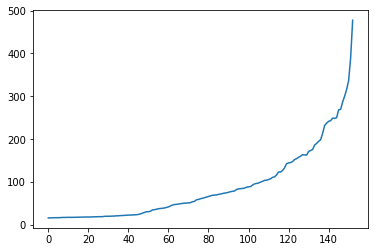

In [10]:
# 畫出趨勢圖
plt.plot(rewardList)
plt.show()

In [11]:
# 使否要顯示 Model
# 按 Q 結束
RunModel()

In [12]:
# 關閉程式
Agent.session.close()
env.render(close=True)